In [78]:
import pandas as pd
import seaborn as sns

In [79]:
spotify = pd.read_csv('data.csv', sep=',')
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
features= ['tempo']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(spotify[features], spotify['year'])

DecisionTreeClassifier(max_depth=1)

In [82]:
predictions = dt.predict(spotify[features])

In [83]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [84]:
calculate_accuracy(predictions, spotify.year)

0.024623112696328324

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
spotify_train, spotify_test = train_test_split(spotify, test_size=0.3, stratify=spotify['year'], random_state=42)
print(spotify_train.shape, spotify_test.shape)

(122072, 19) (52317, 19)


In [87]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [88]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())

In [92]:
penguins['sex'] = penguins['sex'].fillna(value='Male')

In [93]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [94]:
features = ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(penguins[features], penguins['island'])

DecisionTreeClassifier(max_depth=1)

In [95]:
from sklearn import tree

def plot_tree_classification(model, features, class_names):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          class_names=class_names,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(167.4, 163.07999999999998, 'body_mass_g <= 4562.5\ngini = 0.609\nsamples = 344\nvalue = [168, 124, 52]\nclass = Torgersen'),
 Text(83.7, 54.360000000000014, 'gini = 0.611\nsamples = 231\nvalue = [60, 121, 50]\nclass = Biscoe'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.086\nsamples = 113\nvalue = [108, 3, 2]\nclass = Torgersen')]

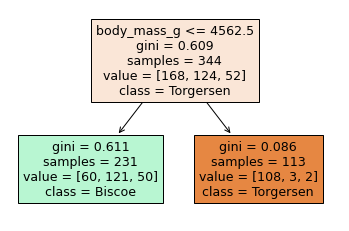

In [96]:
plot_tree_classification(dt, features, penguins.island.unique())

In [97]:
predictions = dt.predict(penguins[features])

In [98]:

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [99]:
calculate_accuracy(predictions, penguins.island)

0.6656976744186046

De accuracy is ongeveer 67% wat redelijk veel is

In [100]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['island'], random_state=42)

print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [101]:
features = ['body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['island'])

DecisionTreeClassifier(max_depth=3)

In [102]:
predictionsOnTrainSet = dt_classification.predict(penguins_train[features])
predictionsOnTestSet = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, penguins_train.island)
accuracyTest = calculate_accuracy(predictionsOnTestSet, penguins_test.island)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6708333333333333
Accuracy on test set 0.6826923076923077


We zien hier dat de accuracy op de test hoger is dan op de training wat apart is sinds de training nauwkeuriger zou moeten zijn